In [1]:
import utils.notebooks as nb
from utils.loader import DicomDataset3D
from torch.utils.data import DataLoader
from monai.losses import DiceLoss
import torch
from models.WNet2 import WNetSingleOutput
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

BATCH_SIZE = 4
EPOCHS = 1000
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = WNetSingleOutput(1).to(device)

train_dl = DataLoader(DicomDataset3D("data/train.csv"), batch_size=BATCH_SIZE)
validation_dl = DataLoader(DicomDataset3D("data/validation.csv"), batch_size=BATCH_SIZE)
test_dataloader = DataLoader(DicomDataset3D("data/test.csv"), batch_size=BATCH_SIZE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
# pos_weight = torch.tensor([100]).to(device)
# criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight).to(device)
criterion = DiceLoss()
# model.load_state_dict(torch.load('./state_dicts/wnet_more_augment/best/wnet_more_augment_epoch_180_loss_0.0001.pk'))

/home/casimir/UNI/WS_22/KAP/venv/lib/python3.11/site-packages/monai/networks/nets/unet.py:139: UserWarning: `len(strides) > len(channels) - 1`, the last 1 values of strides will not be used.
  warnings.warn(f"`len(strides) > len(channels) - 1`, the last {delta} values of strides will not be used.")


In [2]:
nb.train(model, train_dl, validation_dl, optimizer, criterion, EPOCHS, writer, model_name='monai_dice')

epoch: 0
validating
validation loss: 0.8974056541919708
tensor(0.9308, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
epoch: 1
tensor(0.8271, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
epoch: 2
validating
validation loss: 0.7657152712345123
tensor(0.7842, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
epoch: 3
tensor(0.7153, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
epoch: 4
validating
validation loss: 0.7128691375255585
tensor(0.6724, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
epoch: 5
tensor(0.6472, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
epoch: 6
validating
validation loss: 0.6573987603187561
tensor(0.6217, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
epoch: 7
tensor(0.5973, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
epoch: 8
validating
validation loss:

KeyboardInterrupt: 

In [ ]:
torch.save(model.state_dict(), './state_dicts/easy_wnet.pk')
# model.load_state_dict(torch.load('/home/casimir/UNI/WS_22/KAP/state_dicts/wnet/best/wnet_epoch_230_loss_0.0001.pk'))

<All keys matched successfully>

torch.Size([4, 2, 64, 256, 256])
tensor([[[[[1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           ...,
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1]],

          [[1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           ...,
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1]],

          [[1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           ...,
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1]],

          ...,

          [[1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           ...,
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 

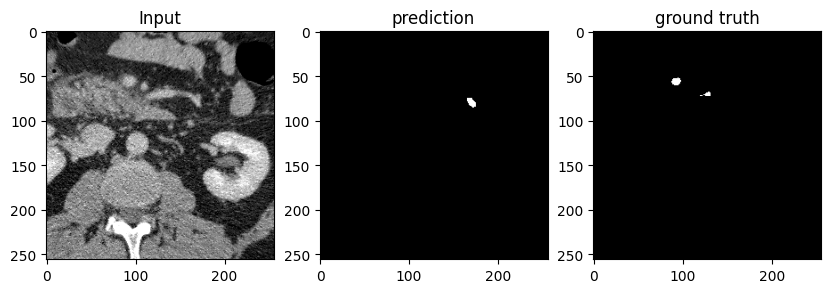

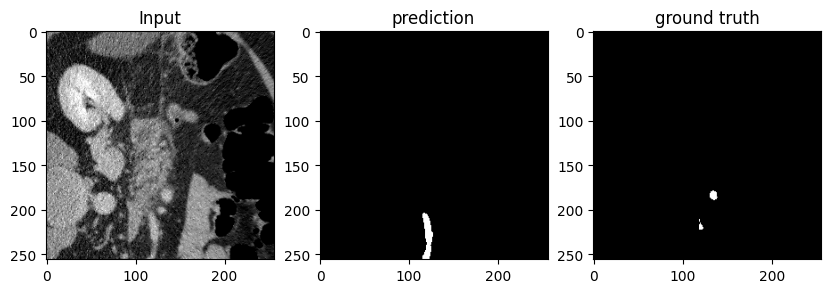

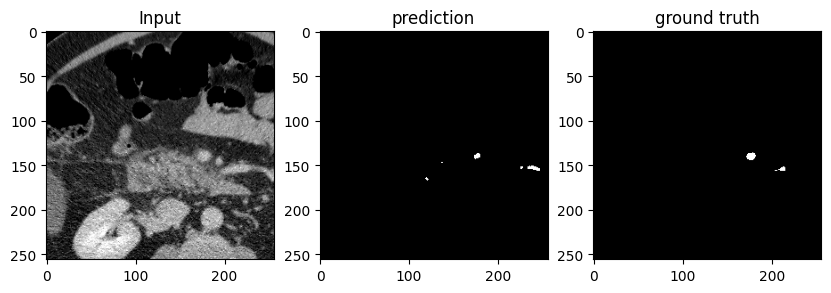

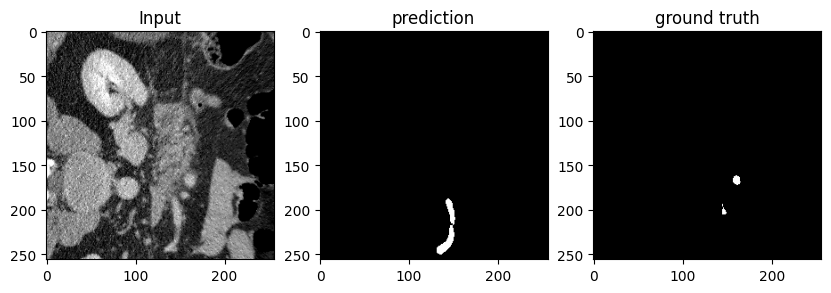

In [ ]:
import importlib
importlib.reload(nb)
nb.plot_predictions(test_dataloader, model, 45)

In [ ]:

writer.add_graph(model, next(iter(train_dl))[0].to(device))
writer.flush()

/home/casimir/UNI/WS_22/KAP/venv/lib/python3.11/site-packages/torch/jit/_trace.py:1084: TracerWarning: Output nr 1. of the traced function does not match the corresponding output of the Python function. Detailed error:
Tensor-likes are not close!

Mismatched elements: 715 / 20971520 (0.0%)
Greatest absolute difference: 4.5299530029296875e-05 at index (3, 0, 79, 191, 75) (up to 1e-05 allowed)
Greatest relative difference: 0.0896358543417367 at index (1, 0, 69, 116, 80) (up to 1e-05 allowed)
  _check_trace(
